# Verify Data

In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from train import SegmentationDataset, get_transforms, prepare_data

In [2]:
 # Prepare data
train_images, train_masks = prepare_data("./data/train", repeats=2)
val_images, val_masks = prepare_data("./data/val", repeats=1)
train_transforms, val_transforms = get_transforms()

# Create datasets
train_dataset = SegmentationDataset(train_images, train_masks, train_transforms)
val_dataset = SegmentationDataset(val_images, val_masks, val_transforms)

train_loader = DataLoader(
    train_dataset, 
    batch_size=16, 
    shuffle=True, 
    num_workers=4, 
    pin_memory=True
)
val_loader = DataLoader(
    val_dataset, 
    batch_size=2, 
    shuffle=False, 
    num_workers=2, 
    pin_memory=True
)

[PosixPath('/workspace/tbchallenge/data/train/images/A-102 .00 - 2ND FLOOR PLAN CROP.png'), PosixPath('/workspace/tbchallenge/data/train/images/A0.54-FOURTH-FLOOR-REFERENCE-PLAN-Rev.1CROP.png'), PosixPath('/workspace/tbchallenge/data/train/images/A1.02A-SECOND-FLOOR-PLAN-PART-A-Rev.3CROP.png'), PosixPath('/workspace/tbchallenge/data/train/images/A-102 .00 - 2ND FLOOR PLAN CROP.png'), PosixPath('/workspace/tbchallenge/data/train/images/A0.54-FOURTH-FLOOR-REFERENCE-PLAN-Rev.1CROP.png'), PosixPath('/workspace/tbchallenge/data/train/images/A1.02A-SECOND-FLOOR-PLAN-PART-A-Rev.3CROP.png')]
[PosixPath('/workspace/tbchallenge/data/train/masks/A-102 .00 - 2ND FLOOR PLAN CROP.png'), PosixPath('/workspace/tbchallenge/data/train/masks/A0.54-FOURTH-FLOOR-REFERENCE-PLAN-Rev.1CROP.png'), PosixPath('/workspace/tbchallenge/data/train/masks/A1.02A-SECOND-FLOOR-PLAN-PART-A-Rev.3CROP.png'), PosixPath('/workspace/tbchallenge/data/train/masks/A-102 .00 - 2ND FLOOR PLAN CROP.png'), PosixPath('/workspace/tbch

In [3]:
from pathlib import Path
Path('/workspace/tbchallenge/data/train/images/A-102 .00 - 2ND FLOOR PLAN CROP.png'
).exists()

True

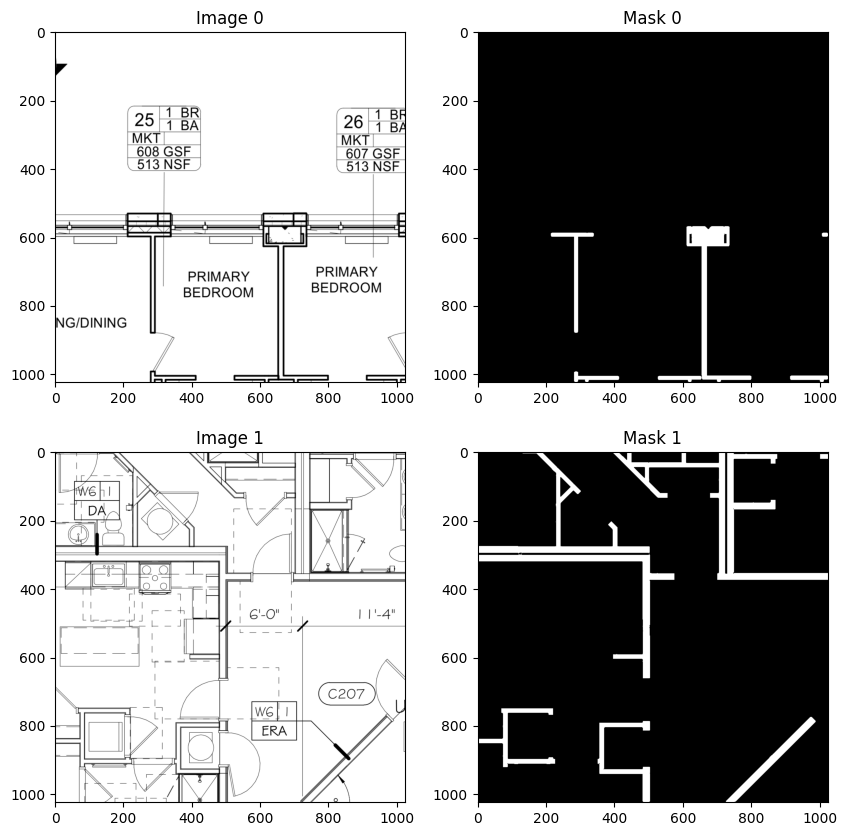

In [4]:
# Visualize some samples
n = 2
fig, axes = plt.subplots(n, 2, figsize=(10, 5 * n))

# tran_batch = next(iter(train_loader))

samples = [val_dataset[i] for i in range(n)]

for idx in range(n):
    image = samples[idx][0]
    mask = samples[idx][1]
    axes[idx, 0].imshow(image.permute(1, 2, 0))  # Permute to HWC for display
    axes[idx, 0].set_title(f"Image {idx}")
    axes[idx, 1].imshow(mask, cmap='gray')
    axes[idx, 1].set_title(f"Mask {idx}")

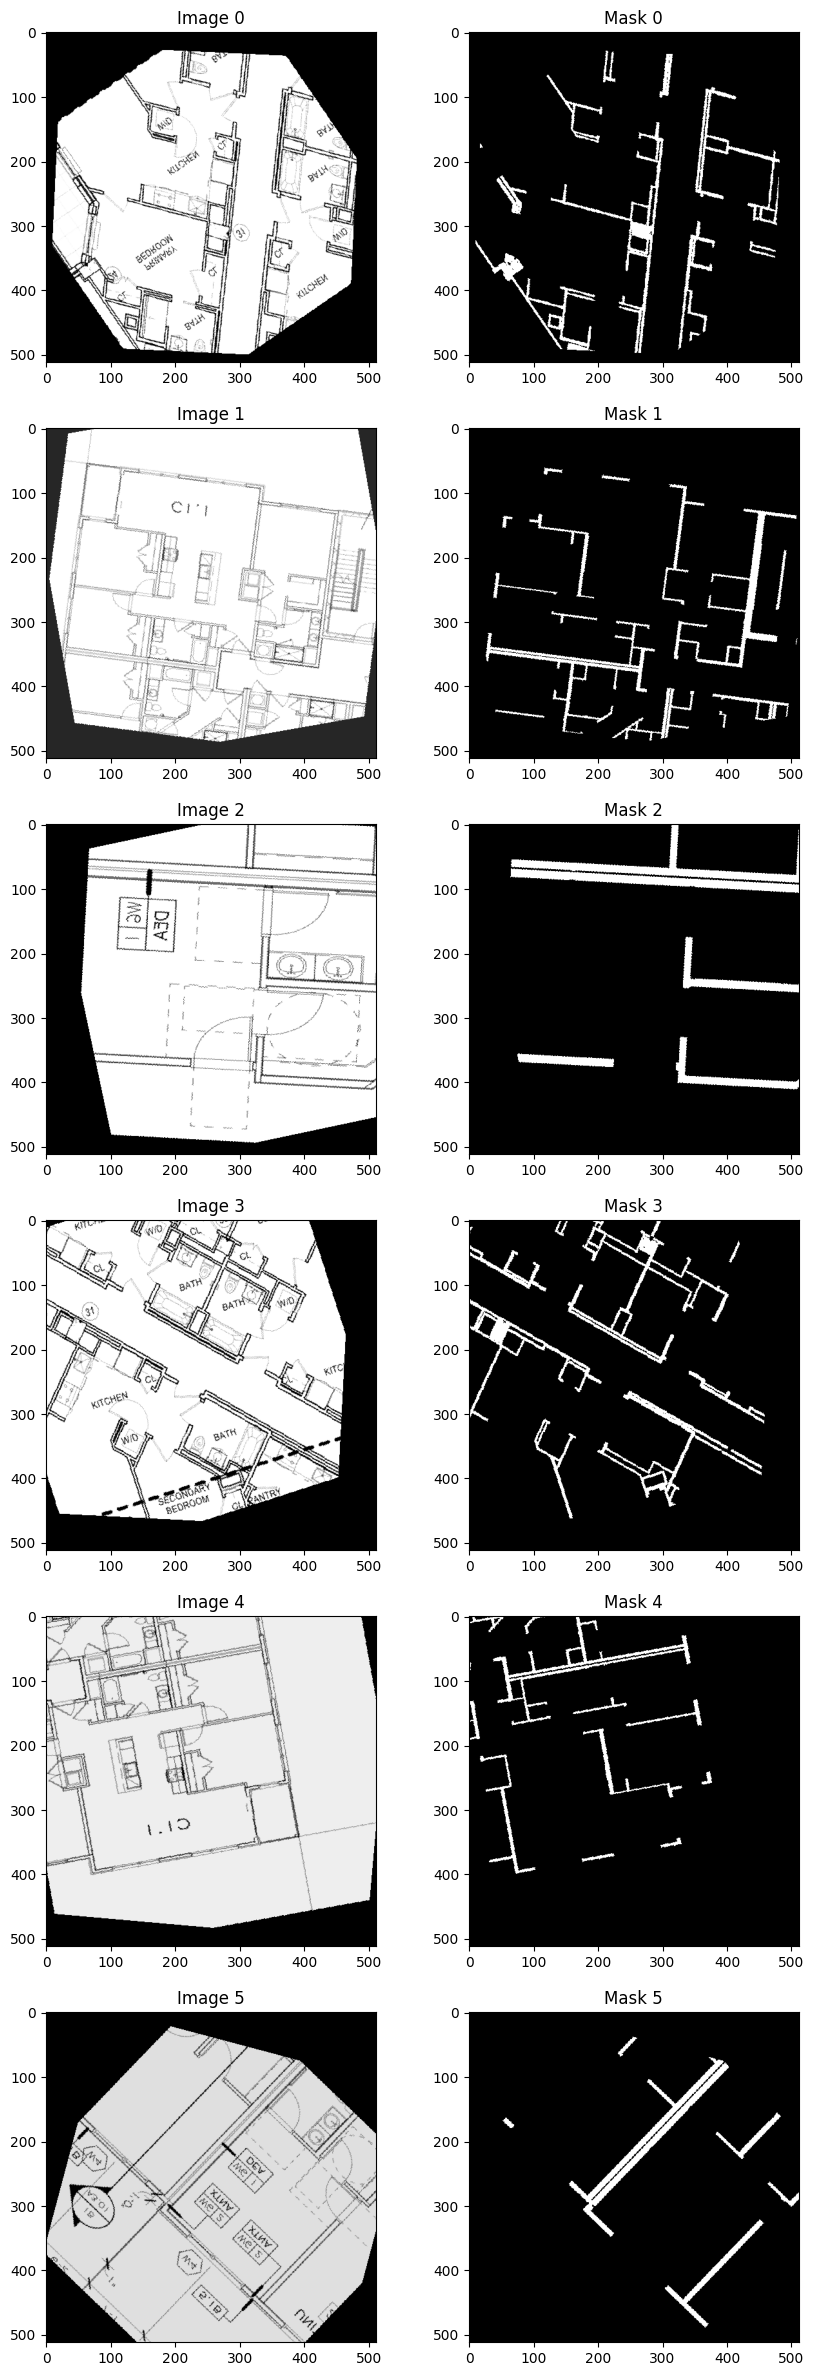

In [5]:
# Visualize some samples
n = 6
fig, axes = plt.subplots(n, 2, figsize=(10, 5 * n))

# tran_batch = next(iter(train_loader))

samples = [train_dataset[i] for i in range(n)]

for idx in range(n):
    image = samples[idx][0]
    mask = samples[idx][1]
    axes[idx, 0].imshow(image.permute(1, 2, 0))  # Permute to HWC for display
    axes[idx, 0].set_title(f"Image {idx}")
    axes[idx, 1].imshow(mask, cmap='gray')
    axes[idx, 1].set_title(f"Mask {idx}")